In [1]:
import stockinator as st
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt
from matplotlib.pylab import date2num
from mplfinance.original_flavor import candlestick_ohlc
from IPython.display import display
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)

In [10]:
tickers = ['^VIX9D', '^VIX', '^VIX3M', '^VIX6M', '^VIX1Y']
df = st.get_stock_data(tickers, period='1d', interval='1d')
display(df)

[*********************100%***********************]  5 of 5 completed


^VIX1Y                                                   ^VIX9D                                                    ^VIX6M                                                  ^VIX  \
                 Open       High        Low  Close Adj Close Volume       Open   High        Low      Close  Adj Close Volume       Open       High    Low      Close  Adj Close Volume   Open   
Date                                                                                                                                                                                             
2020-05-14  34.060001  35.150002  33.759998  34.09     34.09      0  37.740002  39.52  34.669998  35.509998  35.509998      0  38.009998  39.189999  37.27  37.650002  37.650002      0  35.16   

                                                                  ^VIX3M                                                     
                 High        Low      Close  Adj Close Volume       Open       High        Low      Close  Adj Close Volume  
Date                                                                                                                         
2020-05-14  39.279999  34.549999  35.799999  35.799999      0  38.169998  39.689999  37.150002  37.610001  37.610001      0

In [3]:
data = pd.DataFrame(
    columns=['Term', 'TermPct'])

data = data.append({'Term': 'Term1', 'TermPct': df['^VIX9D']['Close'][-1]/df['^VIX']['Close'][-1] * 100}, ignore_index=True)
data = data.append({'Term': 'Term2', 'TermPct': df['^VIX']['Close'][-1]/df['^VIX3M']['Close'][-1] * 100}, ignore_index=True)
data = data.append({'Term': 'Term3', 'TermPct': df['^VIX']['Close'][-1]/df['^VIX6M']['Close'][-1] * 100}, ignore_index=True)
data = data.append({'Term': 'Term4', 'TermPct': df['^VIX']['Close'][-1]/df['^VIX1Y']['Close'][-1] * 100}, ignore_index=True)
data = data.append({'Term': 'Term5', 'TermPct': df['^VIX3M']['Close'][-1]/df['^VIX1Y']['Close'][-1] * 100}, ignore_index=True)



In [4]:
data

,Term,TermPct
0,Term1,99.220049
1,Term2,95.478731
2,Term3,95.149753
3,Term4,105.186055
4,Term5,110.167001


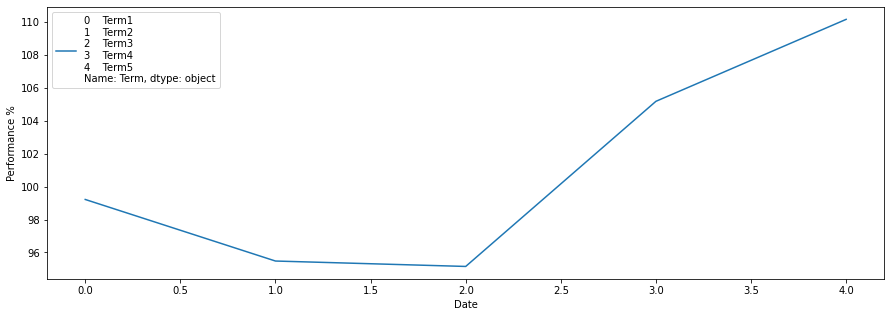

In [7]:
plt.figure(figsize=(15,5))
plt.xlabel("Date")
plt.ylabel("Performance %")
plt.plot(data.index, data['TermPct'], label=data.Term)
plt.legend()
plt.show()
